In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
# load data
df = pd.read_csv(open('penguins.csv', 'rb'))
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Get descriptive statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [4]:
# Investigate data
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
# Clean data

# According the data set min value of flipper_length_mm is -132 and is is a little bit strange
# and max value of flipper_length_mm is 5000 mm (5 metres) while mean value is 214
df = df[(df['flipper_length_mm'] >= 0) & (df['flipper_length_mm'] <= 1000)]

# Get rid of 'sex' as a object and conver it into categorical feature
gender_mapping = {'FEMALE' : 0, 'MALE' : 1}
df['sex'] = df['sex'].map(gender_mapping)

df = df.dropna()
df = df.drop_duplicates()

# And normalize it
scaler = StandardScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(data = X, columns = df.columns)

df.describe()

<ipython-input-5-38ab4476018e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map(gender_mapping)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17,-1.391123e-16
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00,-1.006042e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01,-1.006042e+00
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01,9.939939e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01,9.939939e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00,9.939939e-01


array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

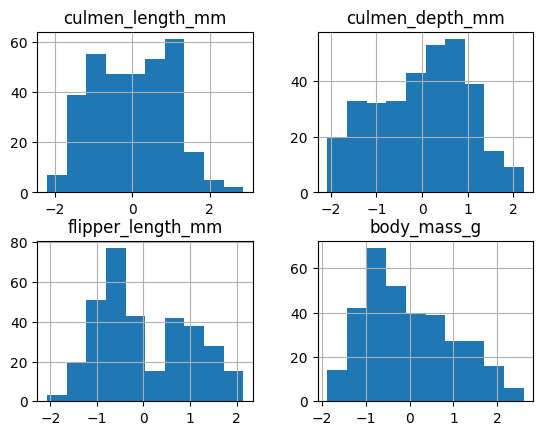

In [6]:
# Now data is clean

# Visialize it
df.drop('sex', axis = 1).hist()

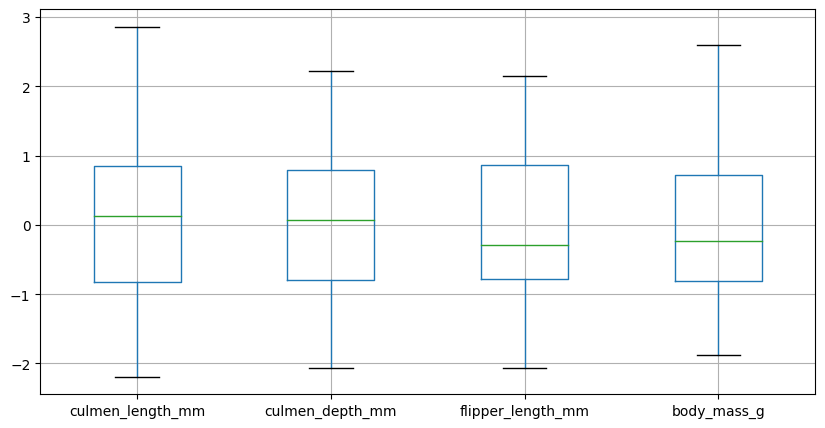

In [7]:
# Get boxplots
plt.figure(figsize = (10, 5))
df.drop('sex', axis = 1).boxplot()
plt.show()

In [8]:
# Try PCA to squeeze feature space
from sklearn.decomposition import PCA

pca = PCA()
penguins_PCA = pca.fit_transform(df)

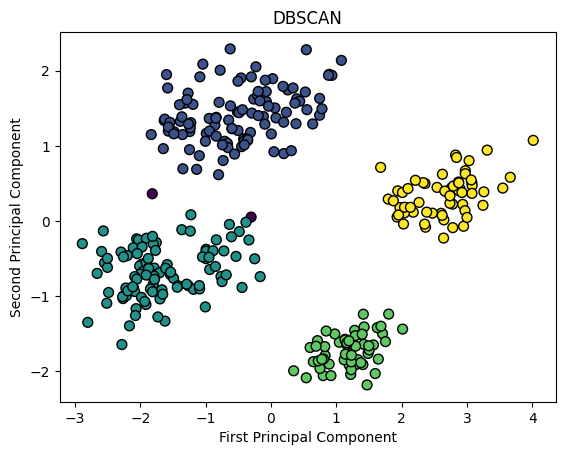

In [9]:
# Try DBSCAN
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = 1, min_samples = 5)
clustering.fit(penguins_PCA)

labels = clustering.labels_

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c = labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title('DBSCAN')
plt.show()

In [10]:
# Get metrics
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, calinski_harabasz_score

silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_PCA[:, 0], labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.49167917798215593

Homogeneity: 0.23694183294557697
Completeness: 0.9999999999999997
V-measure: 0.3831090947604841

Calinski-Harabasz Index: 278.76616775319724


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-42-35a59589d3e9>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clst[0], clst[1], cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black', c = c)


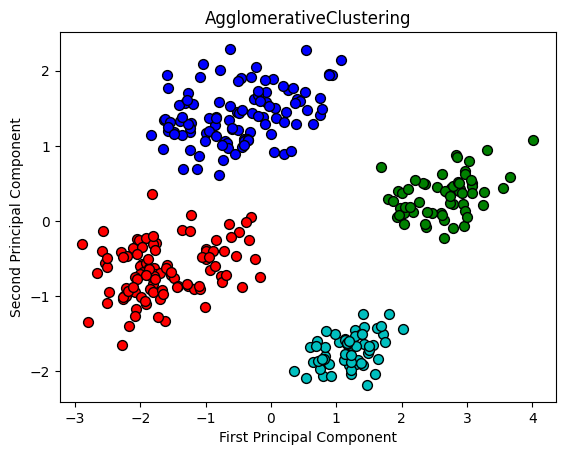

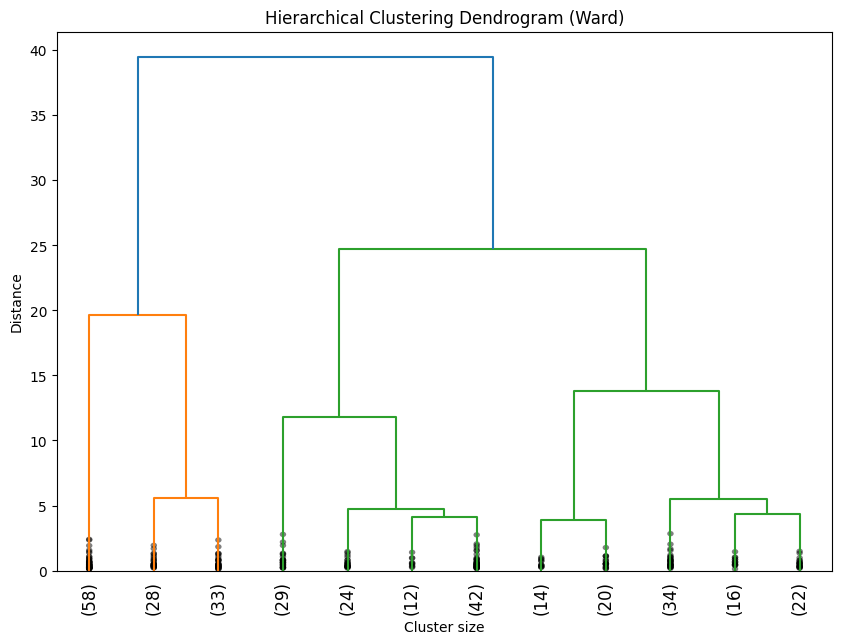

In [42]:
# DBSCAN find 4 clusters and 2 outlier

from sklearn.cluster import AgglomerativeClustering
from itertools import cycle
from scipy.cluster.hierarchy import dendrogram, linkage

clusters_num = 4

clustering = AgglomerativeClustering(n_clusters = clusters_num, linkage = "ward", affinity = 'euclidean')

x_pr = clustering.fit_predict(penguins_PCA)

for c, n in zip(cycle('bgrc'), range(clusters_num)):
    clst = np.array(penguins_PCA[x_pr == n]).T
    plt.scatter(clst[0], clst[1], cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black', c = c)

plt.title('AgglomerativeClustering')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

linekage_matrix = linkage(penguins_PCA, method = 'ward', metric = 'euclidean')

plt.figure(figsize = (10, 7))
dendrogram(linekage_matrix, truncate_mode='lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12., show_contracted = True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [15]:
# Get metrics
silhouette_avg = silhouette_score(df, x_pr)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_PCA[:, 0], x_pr)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, x_pr)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5085922485155359

Homogeneity: 0.23178408409867132
Completeness: 0.9999999999999997
V-measure: 0.3763388195882946

Calinski-Harabasz Index: 363.96580744358613


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


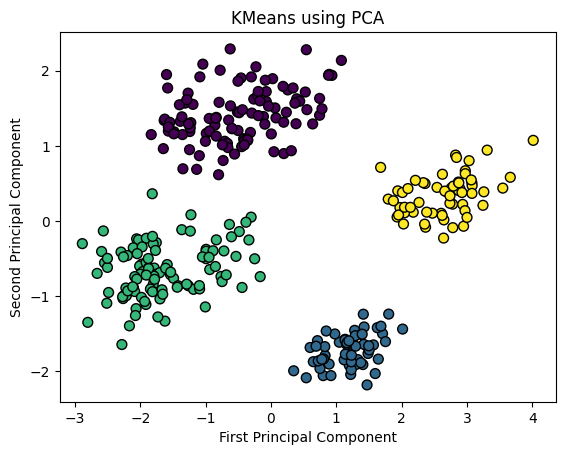

In [16]:
# Try K-mean
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans_labels = kmeans.fit_predict(penguins_PCA)

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c = kmeans_labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title('KMeans using PCA')
plt.show()

In [17]:
# Get metrics
silhouette_avg = silhouette_score(df, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_PCA[:, 0], kmeans_labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, kmeans_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5085922485155359

Homogeneity: 0.23178408409867132
Completeness: 0.9999999999999996
V-measure: 0.3763388195882946

Calinski-Harabasz Index: 363.965807443586


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [19]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=c0e6f9839455e686a37e1e77a04556c8dbf05581a9f009326bde397248032e4f
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [20]:
# Try use UMAP 2D instand of PCA
import umap

umap_model = umap.UMAP(n_components = 2)
penguins_umap = umap_model.fit_transform(df)

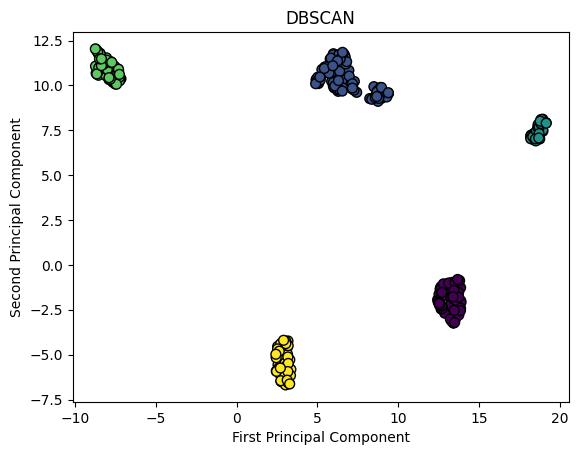

In [21]:
# Try DBSCAN with UMAP 2D
clustering = DBSCAN(eps = 1, min_samples = 5)
clustering.fit(penguins_umap)

labels = clustering.labels_

plt.scatter(penguins_umap[:, 0], penguins_umap[:, 1], c = labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title('DBSCAN')
plt.show()

In [24]:
# Get metrics
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_umap[:, 0], labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5190257629856188

Homogeneity: 0.26629254650468115
Completeness: 0.9999999999999997
V-measure: 0.4205861390240706

Calinski-Harabasz Index: 389.1797718121338


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-25-91edb92abfe7>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clst[0], clst[1], cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black', c = c)


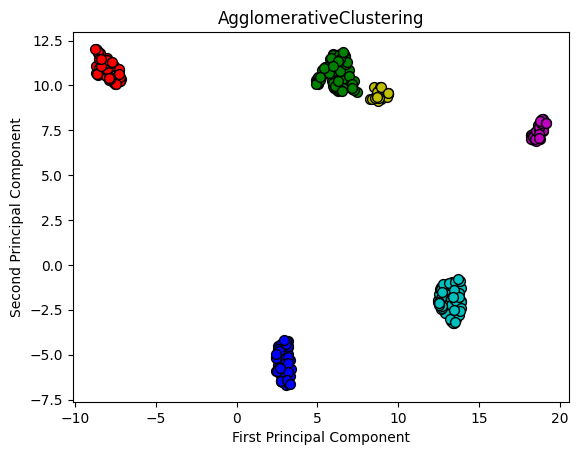

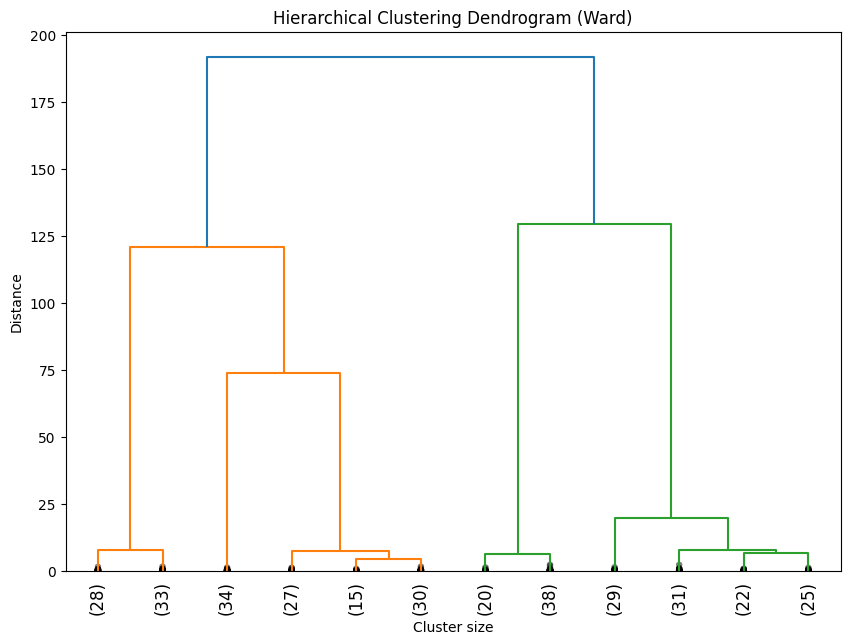

In [25]:
# DBSCAN shows 5 clusters, but it's obviosly that there are 6 of them

clusters_num = 6

clustering = AgglomerativeClustering(n_clusters = clusters_num, linkage = "ward", affinity = 'euclidean')

x_pr = clustering.fit_predict(penguins_umap)

for c, n in zip(cycle('bgrcmy'), range(clusters_num)):
    clst = np.array(penguins_umap[x_pr == n]).T
    plt.scatter(clst[0], clst[1], cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black', c = c)

plt.title('AgglomerativeClustering')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

linekage_matrix = linkage(penguins_umap, method = 'ward', metric = 'euclidean')

plt.figure(figsize = (10, 7))
dendrogram(linekage_matrix, truncate_mode='lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12., show_contracted = True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [26]:
# Get metrics
silhouette_avg = silhouette_score(df, x_pr)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_umap[:, 0], x_pr)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, x_pr)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5279608441884877

Homogeneity: 0.298730496860027
Completeness: 0.9999999999999999
V-measure: 0.4600346223982191

Calinski-Harabasz Index: 435.0243963607167


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


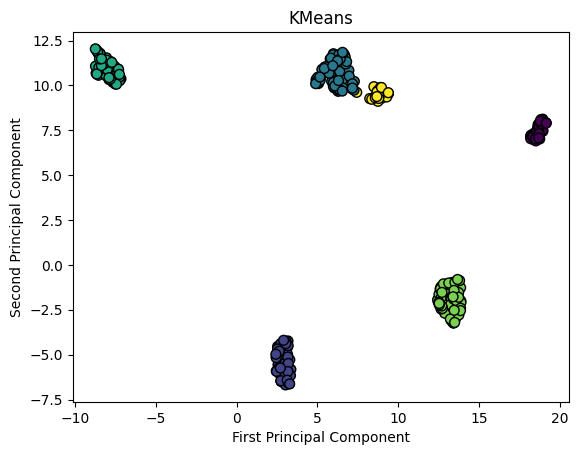

In [27]:
# Based on metrics it's seems that 6 clusters get better resualt than 5 or 4

# Try K-means
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans_labels = kmeans.fit_predict(penguins_umap)

plt.scatter(penguins_umap[:, 0], penguins_umap[:, 1], c = kmeans_labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title('KMeans')
plt.show()

In [28]:
# Get metrics
silhouette_avg = silhouette_score(df, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_umap[:, 0], kmeans_labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, kmeans_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5268202834434036

Homogeneity: 0.2992316778947787
Completeness: 0.9999999999999999
V-measure: 0.46062866690510706

Calinski-Harabasz Index: 434.9687007843413


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [29]:
# Try UMAP on 3D
umap_model = umap.UMAP(n_components = 3)
penguins_umap = umap_model.fit_transform(df)

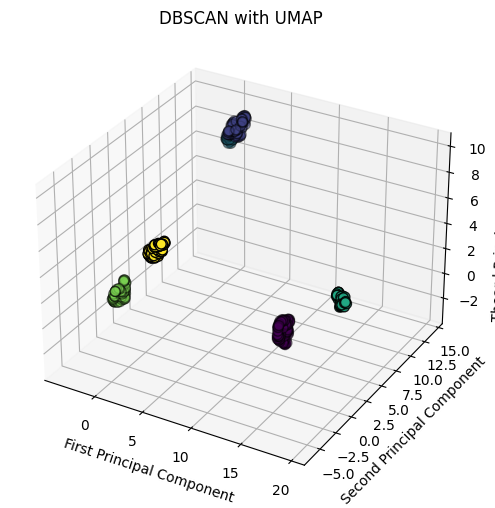

In [30]:
clustering = DBSCAN(eps = 1, min_samples = 5)
clustering.fit(penguins_umap)

labels = clustering.labels_

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(penguins_umap[:, 0], penguins_umap[:, 1], penguins_umap[:, 2], c = labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
ax.set_title('DBSCAN with UMAP')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Theard Principal Component')
plt.show()

In [31]:
# Get metrics
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_umap[:, 0], labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5279608441884877

Homogeneity: 0.298730496860027
Completeness: 0.9999999999999998
V-measure: 0.4600346223982191

Calinski-Harabasz Index: 435.02439636071676


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


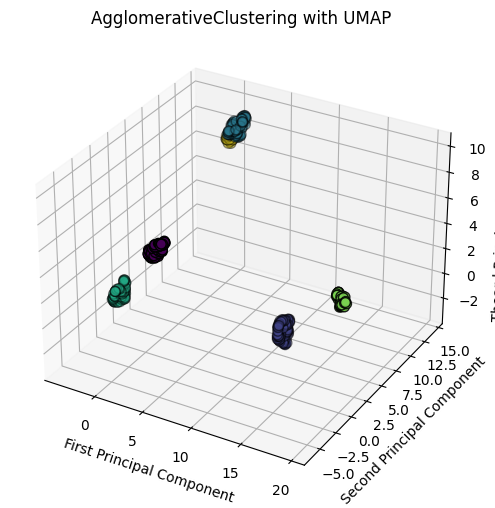

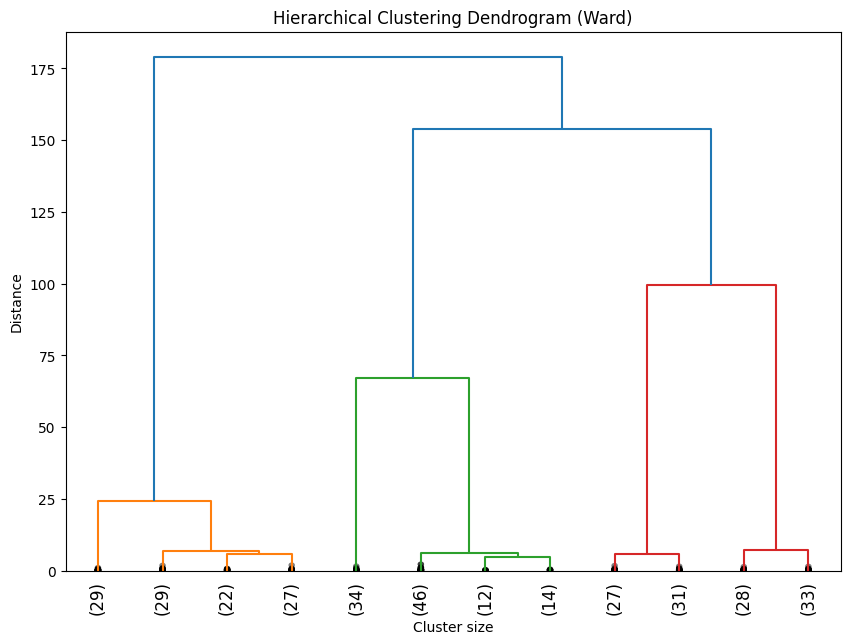

In [33]:
# Still keep 6 clusters
clusters_num = 6

clustering = AgglomerativeClustering(n_clusters = clusters_num, linkage = "ward", affinity = 'euclidean')

x_pr = clustering.fit_predict(penguins_umap)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(penguins_umap[:, 0], penguins_umap[:, 1], penguins_umap[:, 2], c = x_pr, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
ax.set_title('AgglomerativeClustering with UMAP')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Theard Principal Component')
plt.show()

linekage_matrix = linkage(penguins_umap, method = 'ward', metric = 'euclidean')

plt.figure(figsize = (10, 7))
dendrogram(linekage_matrix, truncate_mode='lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12., show_contracted = True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [34]:
# Get metrics
silhouette_avg = silhouette_score(df, x_pr)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_umap[:, 0], x_pr)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, x_pr)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5279608441884877

Homogeneity: 0.298730496860027
Completeness: 0.9999999999999998
V-measure: 0.4600346223982191

Calinski-Harabasz Index: 435.02439636071676


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


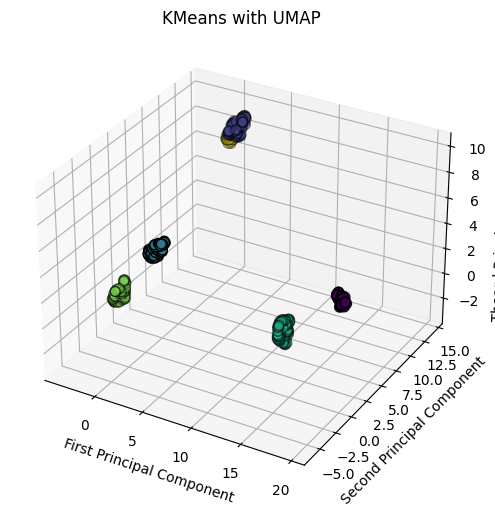

In [35]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans_labels = kmeans.fit_predict(penguins_umap)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(penguins_umap[:, 0], penguins_umap[:, 1], penguins_umap[:, 2], c = kmeans_labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
ax.set_title('KMeans with UMAP')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Theard Principal Component')
plt.show()

In [36]:
# Get metrics
silhouette_avg = silhouette_score(df, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_umap[:, 0], kmeans_labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, kmeans_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5279608441884877

Homogeneity: 0.298730496860027
Completeness: 0.9999999999999998
V-measure: 0.4600346223982191

Calinski-Harabasz Index: 435.02439636071676


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [37]:
# Perform LDA usage
# LDA need target value, so i use kmeans_labels as target class label
# but for some reason i cannot use original data Frame as feature space
# so i pick penguins_umap for 3D and try to reduse feature space to 2.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

penguins_lda = lda.fit_transform(penguins_umap, kmeans_labels)

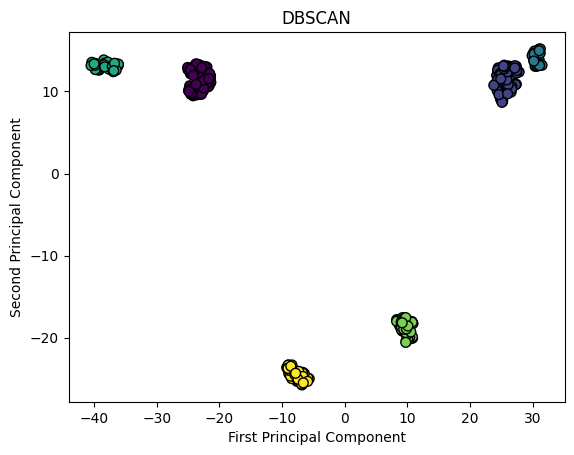

In [38]:
# Try DBSCAN with LDA
clustering = DBSCAN(eps = 1, min_samples = 5)
clustering.fit(penguins_lda)

labels = clustering.labels_

plt.scatter(penguins_lda[:, 0], penguins_lda[:, 1], c = labels, cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title('DBSCAN')
plt.show()

In [39]:
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_lda[:, 0], labels)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5279608441884877

Homogeneity: 0.298730496860027
Completeness: 0.9999999999999998
V-measure: 0.4600346223982191

Calinski-Harabasz Index: 435.02439636071676


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-40-5c40ab2bad2d>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clst[0], clst[1], cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black', c = c)


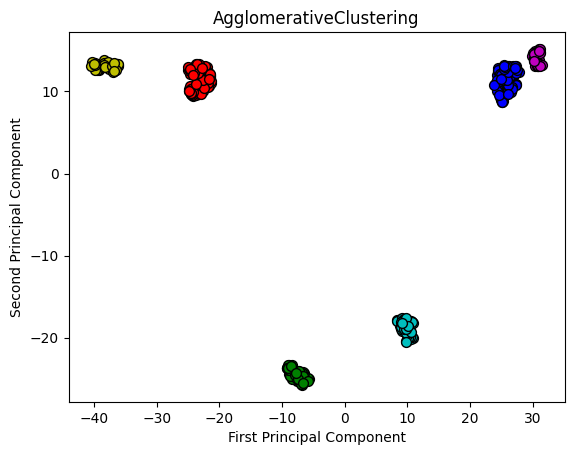

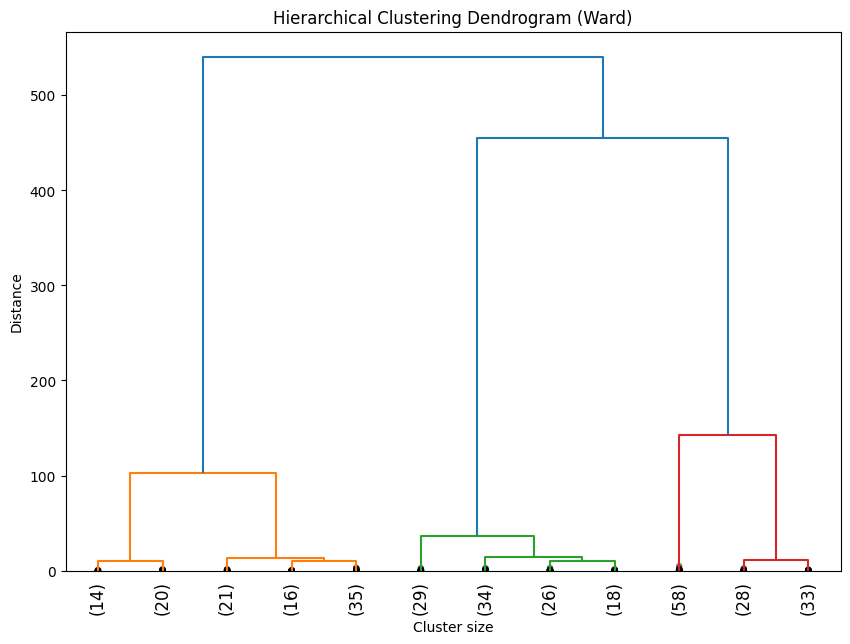

In [40]:
clusters_num = 6

clustering = AgglomerativeClustering(n_clusters = clusters_num, linkage = "ward", affinity = 'euclidean')

x_pr = clustering.fit_predict(penguins_lda)

for c, n in zip(cycle('bgrcym'), range(clusters_num)):
    clst = np.array(penguins_lda[x_pr == n]).T
    plt.scatter(clst[0], clst[1], cmap = "viridis", s = 50, marker = 'o', edgecolors = 'black', c = c)

plt.title('AgglomerativeClustering')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

linekage_matrix = linkage(penguins_lda, method = 'ward', metric = 'euclidean')

plt.figure(figsize = (10, 7))
dendrogram(linekage_matrix, truncate_mode='lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12., show_contracted = True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [41]:
# Get metrics
silhouette_avg = silhouette_score(df, x_pr)
print(f"Silhouette Score: {silhouette_avg}\n")

# Homogeneity, Completeness, V-measure
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(penguins_lda[:, 0], x_pr)
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}\n")

# Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(df, x_pr)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Silhouette Score: 0.5279608441884877

Homogeneity: 0.298730496860027
Completeness: 0.9999999999999998
V-measure: 0.4600346223982191

Calinski-Harabasz Index: 435.02439636071676


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
